In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [98]:
dist6 = pd.read_csv("resultados_defesa/dist6_1_10.csv",index_col=0)
dist = dist6[['XMEAS%02d' % x for x in [1,2,3,6,7,8,9,21]]]


In [79]:
def sig_corr(x1, x2, wlag):
    correlations = np.zeros(wlag)
    for i in np.arange(0, wlag):
        correlations[i] = (1/(len(x1) - i))*np.dot(x1[i:],x2[:(len(x2) - i)])
    max_index = np.argmax(np.abs(correlations))
    max_val = correlations[max_index]
    return max_val

In [86]:
mat =np.zeros([8,8])
df = pd.DataFrame()

In [87]:
for i, col_1 in enumerate(dist_1.columns):
    for j, col_2 in enumerate(dist_1.columns):
        df.at[i,j] = sig_corr(dist_1[col_1], dist_1[col_2],200) 

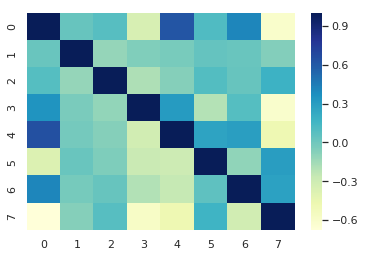

In [93]:
sns.set()
sns.heatmap(df,cmap="YlGnBu")

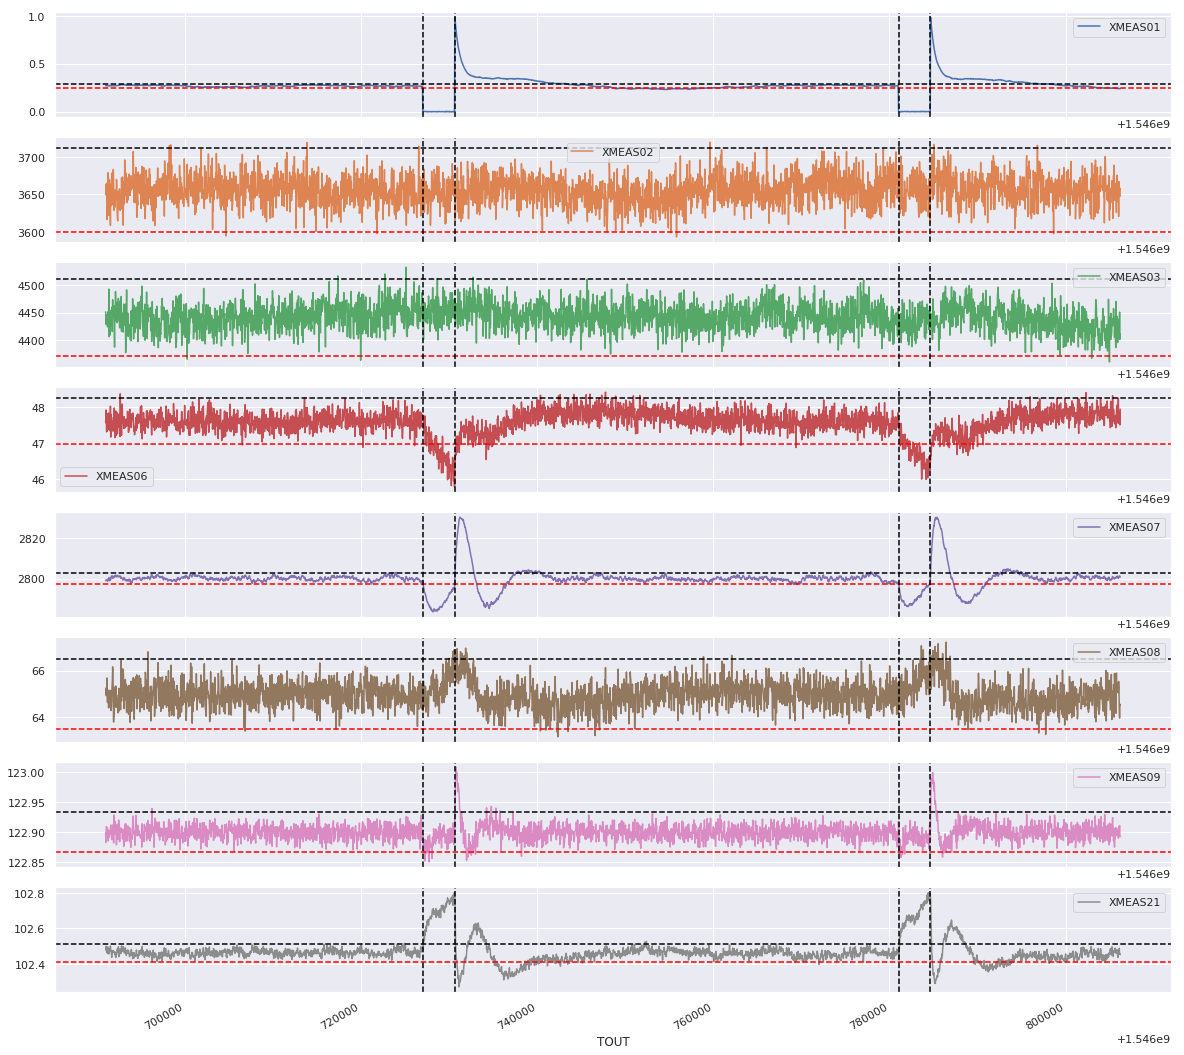

In [103]:
axes = dist.iloc[0:3200].plot(subplots=True, figsize=(20, 20))


for i, ax in enumerate(axes):
    
    high = np.mean(dist[dist.columns[i]].iloc[0:999]) + 3*np.std(dist[dist.columns[i]].iloc[0:999])
    low = np.mean(dist[dist.columns[i]].iloc[0:999]) - 3*np.std(dist[dist.columns[i]].iloc[0:999])
    
    
    ax.axhline(y=high, color="black", ls='--')
    ax.axhline(y=low, color="red", ls='--')
    ax.axvline(x=dist.index[999], color="black", ls='--')
    ax.axvline(x=dist.index[1100], color="black", ls='--')
    ax.axvline(x=dist.index[2500], color="black", ls='--')
    ax.axvline(x=dist.index[2600], color="black", ls='--')
plt.show()

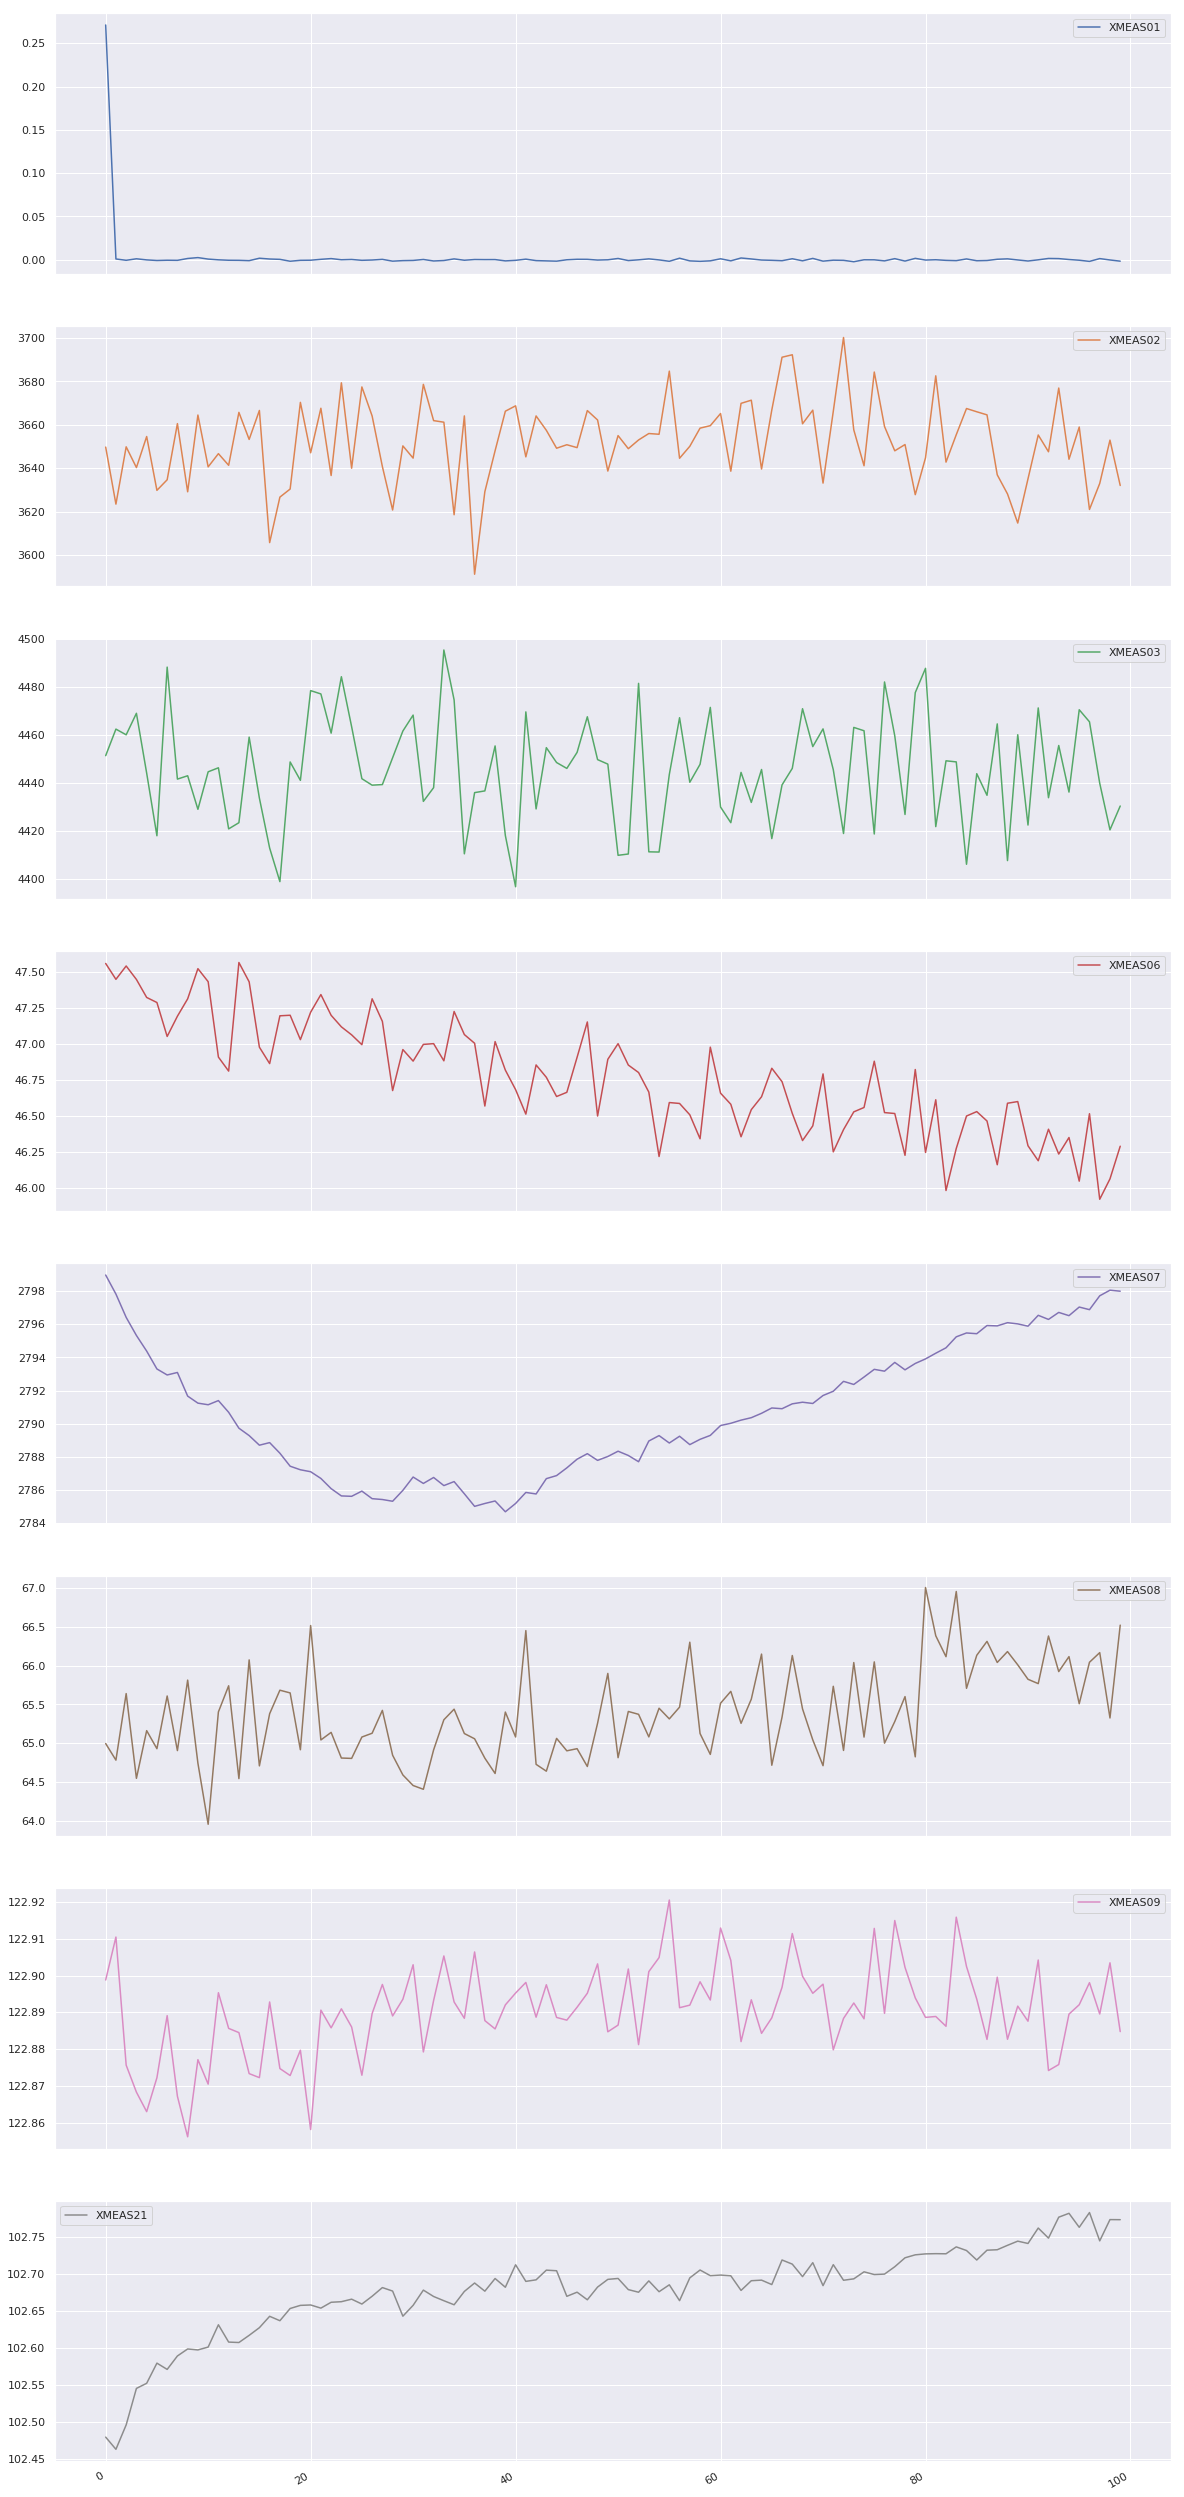

In [106]:
dist6 = pd.read_csv("resultados_defesa/dist6_teste_trip.csv")
axes = dist6[['XMEAS%02d' % x for x in [1,2,3,6,7,8,9,21]]][0:100].plot(subplots=True, figsize=(20, 50))


plt.show()